# 4. Rispondere alle domande
Trasforma le seguenti richiesti in formule per estrarre infromazioni dal dataframe
- Mostrami le vendite maggiori di 10

- Mostrami i dati del 2018

- Mostrami le vendite maggiori di 13 e l'anno è il 2018

- Mostrami tutto TRANNE i casi in cui le vendite sono maggiori di 13 e l'anno è il 2018

- Mostrami i dati dove le vendite divise per 3 sono maggiori di 3

- Mostrami i dipendenti i cui nomi sono alfabeticamente dopo la J



In [1]:
import pandas as pd

sales = pd.DataFrame(
    data={
        "employee": [
            "Katrina",
            "Guanyu",
            "Jan",
            "Roman",
            "Jacqueline",
            "Paola",
            "Esperanza",
            "Alaina",
            "Egweyn",
        ],
        "sales": [14, 17, 6, 12, 8, 3, 7, 15, 5],
        "year": [2018, 2019, 2020, 2018, 2020, 2019, 2019, 2020, 2020],
    }
)

sales[sales['sales'] > 10] #Vendite maggiori di 10

sales[sales['year'] == 2018] #Dati del 2018

sales[(sales['sales'] > 13) & (sales['year'] == 2018)] #Vendite maggiori di 13 anno 2018

sales[~((sales['sales'] > 13) & (sales['year'] == 2018))] #Tutto tranne vendite maggiori di 13 anno 2018

sales[((sales['sales'] / 3) > 3 )] #Vendite divise per 3, maggiori di 3

sales[(sales['employee'] > "J")] #Dipendenti dopo la J

,employee,sales,year
0,Katrina,14,2018
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019


# 5. Analisi di un dataset di video giochi
1. Quanti videogiochi sono stati pubblicati
2. Quali sono i generi più popolari? Mostralo con un bar plot
3. Plotta l'evoluzione del numero di giochi pubblicati nel tempo
4. Prova a riprodurre questo plot 
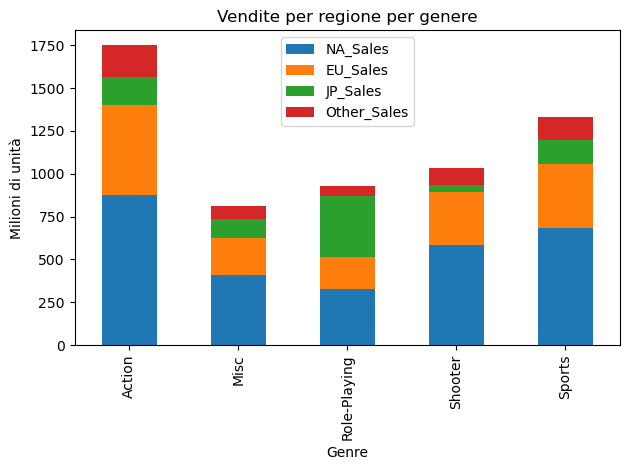


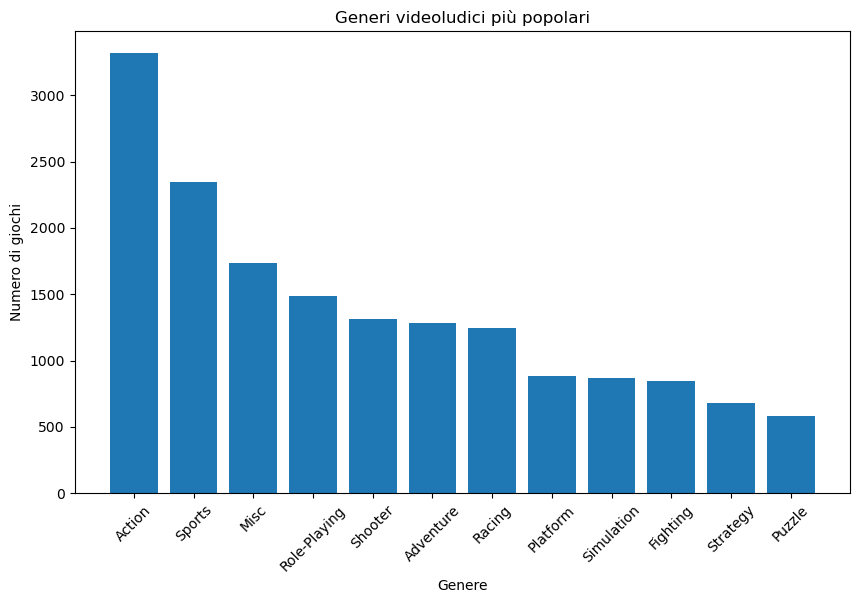

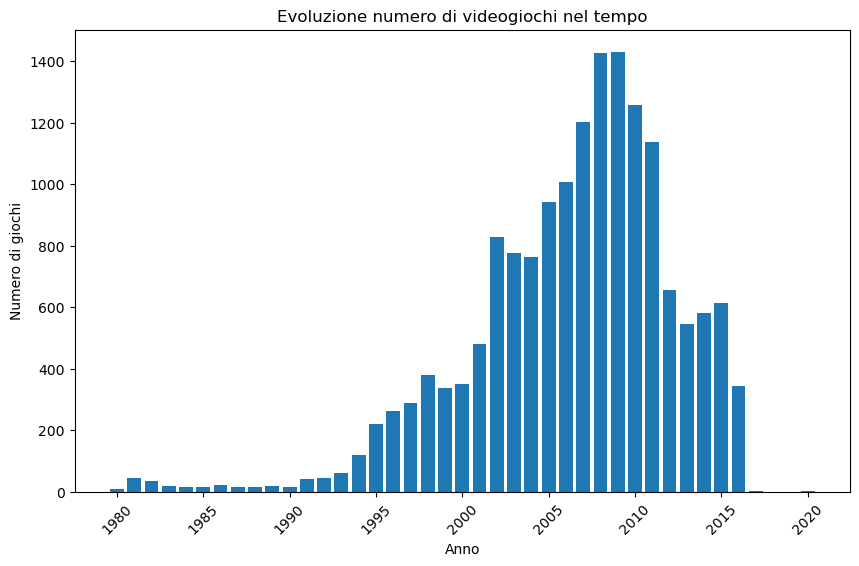

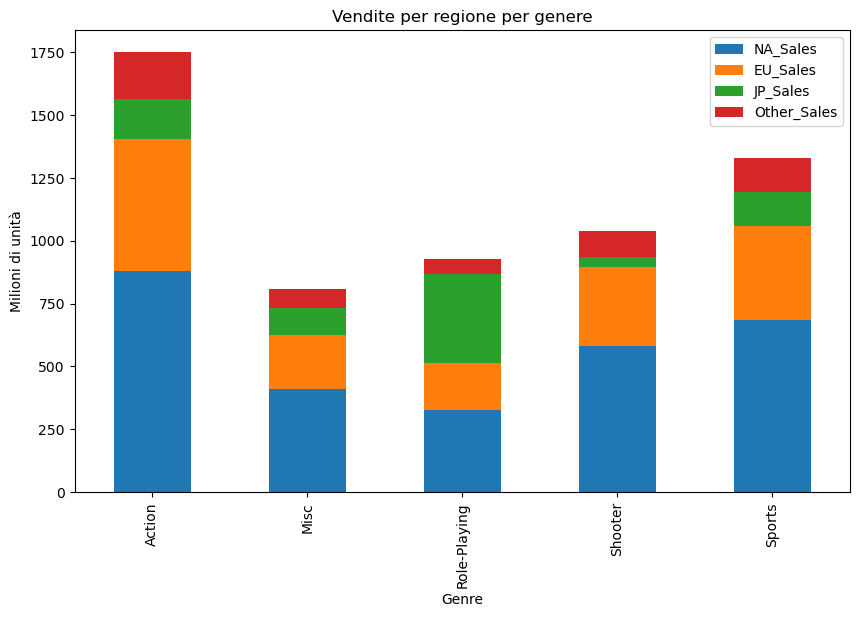

In [3]:
# Import dei pacchetti
import pandas as pd
import matplotlib.pyplot as plt

# Caricamento del dataset
url = 'https://zenodo.org/record/5898311/files/vgsales.csv'
df = pd.read_csv(url)

numero_videogiochi = len(df) #16598

categorie_piu_popolari = df['Genre'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(categorie_piu_popolari.index, categorie_piu_popolari.values)
plt.title('Generi videoludici più popolari')
plt.xlabel('Genere')
plt.ylabel('Numero di giochi')
plt.xticks(rotation=45)
plt.show()

evoluzione_numero_videogiochi = df['Year'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(evoluzione_numero_videogiochi.index, evoluzione_numero_videogiochi.values)
plt.title('Evoluzione numero di videogiochi nel tempo')
plt.xlabel('Anno')
plt.ylabel('Numero di giochi')
plt.xticks(rotation=45)
plt.show()


generi_interessati = ['Action', 'Misc', 'Role-Playing', 'Shooter', 'Sports']
df_filtrato = df[df['Genre'].isin(generi_interessati)]

# Somma le vendite per ogni genere e regione
df_filtrato_grouped = df_filtrato.groupby(['Genre']).agg({
    'NA_Sales': 'sum',
    'EU_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum'
}).reset_index()

# Crea il grafico a barre impilate
df_filtrato_grouped.set_index('Genre').plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Vendite per regione per genere')
plt.ylabel('Milioni di unità')
plt.xlabel('Genre')
plt.show()